In [1]:
# http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
# https://rstudio-pubs-static.s3.amazonaws.com/345459_736f15de86c949978f33ed4348c7fae4.html
# Importing the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy.polynomial.polynomial as poly
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression ,ARDRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve , validation_curve
from sklearn.metrics import confusion_matrix , r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import keras
from keras.models import Sequential , Model
from keras.layers import Dense , LSTM , Input , LeakyReLU , Activation
from keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

from nltk import FreqDist
import tensorflow as tf
import time
%matplotlib inline

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


### This Project has 3 Aims
- It will predict the per Hourly Energy Genrated for the given Feature's
- It will tell u weather ur machine is in Optimized State (make the best or most effective use of (a situation, opportunity, or resource).) or Not (If Not than which State)
- If our Machine is not in Optimal State than it will recommend u the tunned feature's to get ur machine in Optimal State.

In [2]:
# Reading the document (.csv file)
filename = "C:\\Users\\vinayak tyagi\\Desktop\\vinayak_bmc_data.csv"
filename_2 = "C:\\Users\\vinayak tyagi\\Desktop\\power_plant_dataset.csv"
df = pd.read_csv(filename)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Description of data file (Shown Above)

Features consist of hourly average ambient variables 

- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [3]:
# find the desc and empty space in file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [4]:
# finding the statictis of above data (For future use)
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Now finding the feture relation as we know some

- AP (Pressure) directly protional to AT (Temp)
- AT (Temp) inversly protional to RH (Humidity)
- V (Vaccum) inversly protional to AP (Pressure)


###  So, we need to vitulize the data for validating the relation's

Text(0.5,1,'Temperature')

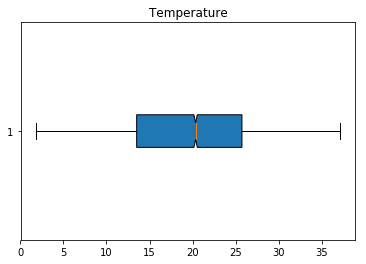

In [5]:
# Box plot to get the exect range of the Feature
plt.boxplot(df["AT"] , vert = False , patch_artist=True , notch=True)
plt.title("Temperature")

Text(0.5,1,'Pressure')

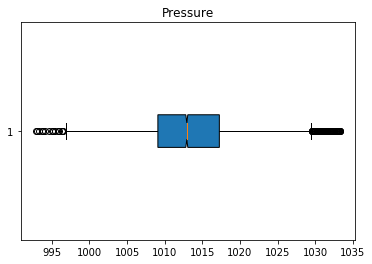

In [6]:
plt.boxplot(df["AP"] , vert = False , patch_artist=True , notch=True)
plt.title("Pressure")

Text(0.5,1,'Vaccume')

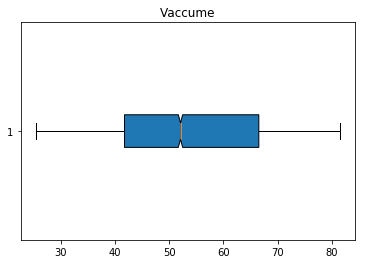

In [7]:
plt.boxplot(df["V"] , vert = False , patch_artist=True , notch=True)
plt.title("Vaccume")

Text(0.5,1,'Humidity')

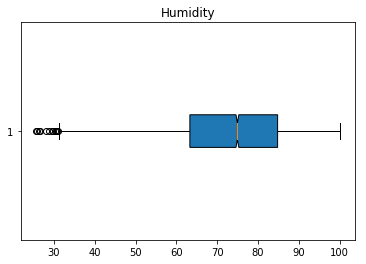

In [8]:
plt.boxplot(df["RH"] , vert = False , patch_artist=True , notch=True)
plt.title("Humidity")

Text(0.5,1,'Electicity genrated')

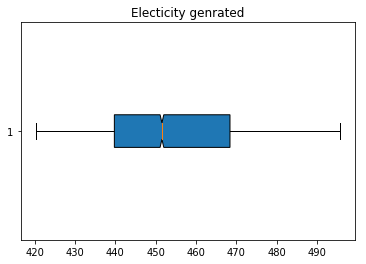

In [9]:
plt.boxplot(df["PE"] , vert = False , patch_artist=True , notch=True)
plt.title("Electicity genrated")

Text(0.5,1,'Temperature')

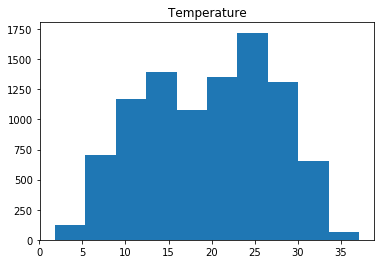

In [10]:
plt.hist(df["AT"])
plt.title("Temperature")

Text(0.5,1,'pressure')

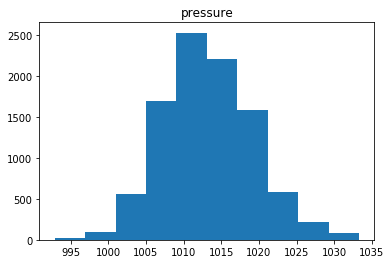

In [11]:
plt.hist(df["AP"])
plt.title("pressure")

Text(0.5,1,'Vaccume')

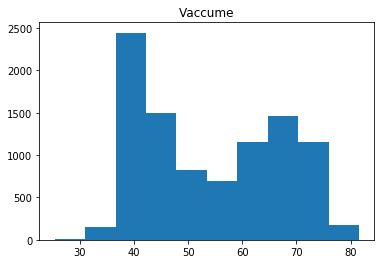

In [12]:
plt.hist(df["V"])
plt.title("Vaccume")

Text(0.5,1,'Humidty')

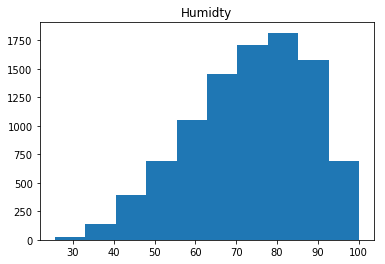

In [13]:
plt.hist(df["RH"])
plt.title("Humidty")

Text(0.5,1,'Electicity genrated ')

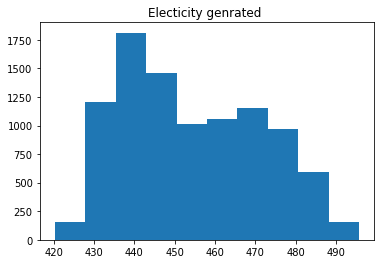

In [14]:
plt.hist(df["PE"])
plt.title("Electicity genrated ")

### By seeing the above observation we get some what intution of our data

### Now , getting observation of all fetare with respect to output genrated

Text(0,0.5,'Electricity genrated by plant')

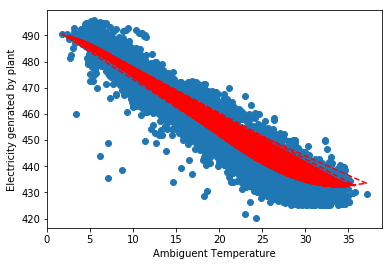

In [15]:
coeff = poly.polyfit(df["AT"], df["PE"],4)
ffit =poly.polyval(df["AT"],coeff)

plt.scatter(df["AT"], df["PE"])
plt.plot(df["AT"], ffit, "r--" )

plt.xlabel("Ambiguent Temperature")
plt.ylabel("Electricity genrated by plant")

###  For deep undestanding (for temp & output) plzzz vist 
-  increase in air density by lowering the temperature, and thus, helps increase the mass flow rate of air to the CT(Combertion terbine) and results in increased output of the CT.
- http://phasechangematerials.blogspot.com/2011/06/turbine-inlet-chilling-tic-with-thermal.html

Text(0,0.5,'Electricity genrated by plant')

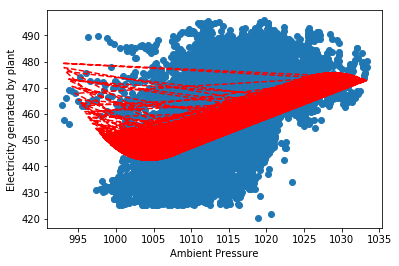

In [16]:
coeff = poly.polyfit(df["AP"], df["PE"],4)
ffit =poly.polyval(df["AP"],coeff)

plt.scatter(df["AP"], df["PE"])
plt.plot(df["AP"], ffit, "r--" )

plt.xlabel("Ambient Pressure")
plt.ylabel("Electricity genrated by plant")

### for depth understanding of above may visit too.
- Ambient pressure relation is mostly related to latitude at heigher latitude low energy is requeried to make steam beacuse of high psessure & vice-versa
- http://125.19.12.214/applications/brihaspat.nsf/6dca49b7264f71ce65256a81003ad1cb/fddd5567e90ccfbde52569160021d1c8/$FILE/turbine.pdf

Text(0,0.5,'Electricity genrated by plant')

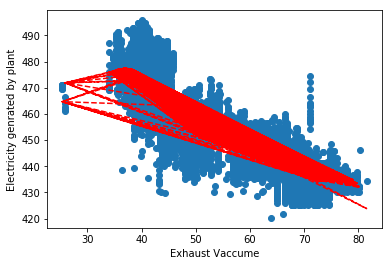

In [17]:
coeff = poly.polyfit(df["V"], df["PE"],10)
ffit =poly.polyval(df["V"],coeff)

plt.scatter(df["V"], df["PE"])
plt.plot(df["V"], ffit, "r--" )

plt.xlabel("Exhaust Vaccume")
plt.ylabel("Electricity genrated by plant")

### for depth understanding may visit
- Exhaust vaume is mainly used in condenser of turbine for removing the most of air from condensed steam and reducing the pressure of steam too.
- https://www.sciencedirect.com/science/article/pii/0042207X79901593

Text(0,0.5,'Electricity genrated by plant')

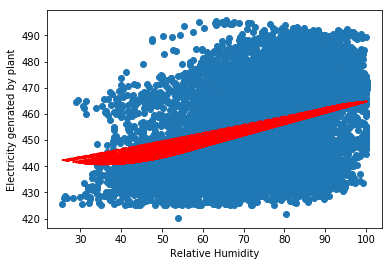

In [18]:
coeff = poly.polyfit(df["RH"], df["PE"],4)
ffit =poly.polyval(df["RH"],coeff)

plt.scatter(df["RH"], df["PE"] )
plt.plot(df["RH"], ffit, "r--" )


plt.xlabel("Relative Humidity")
plt.ylabel("Electricity genrated by plant")

 Relative humidity over here mean's the amount of water vapour present in air expressed as a percentage of the amount needed for saturation at the same temperature

- file:///C:/Users/vinayak%20tyagi/Downloads/V002T02A025-91-GT-329%20(1).pdf

### Trying to visulization the data with pressure & temp Constant

Text(0.5,0,'Pressure')

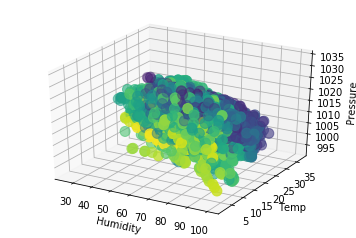

In [19]:
# visuliztion of data in 3d for better understanding
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
rs = np.array(df["AP"])
z = rs.reshape(-1,1)

ax1.scatter(df["RH"], df["AT"], z ,  c = df['PE'] , marker = 'o' , s =100)

ax1.set_xlabel("Humidity")
ax1.set_ylabel("Temp")
ax1.set_zlabel("Pressure")

Text(0.5,0,'Pressure')

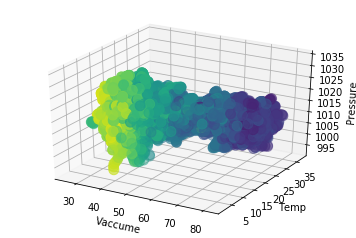

In [20]:
# visuliztion of data in 3d for better understanding
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
rs = np.array(df["AP"])
z = rs.reshape(-1,1)

ax1.scatter(df["V"], df["AT"], z , c = df['PE'] , marker = 'o' , s =100)

ax1.set_xlabel("Vaccume")
ax1.set_ylabel("Temp")
ax1.set_zlabel("Pressure")

###  Now trying to find the depandandace of one fetare on another

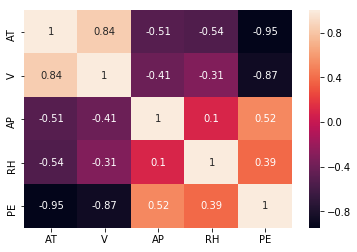

In [21]:
# Finding the Pearson corelation 
sns.heatmap(df.corr(), annot = True)

In [22]:
# seprating the o/p & feture's for training 
fetaures = df["PE"]
df.drop("PE" , axis=1 , inplace = True)
df.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [23]:
X_train , X_test , y_train , y_test = train_test_split(df , fetaures , test_size = 0.3)

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


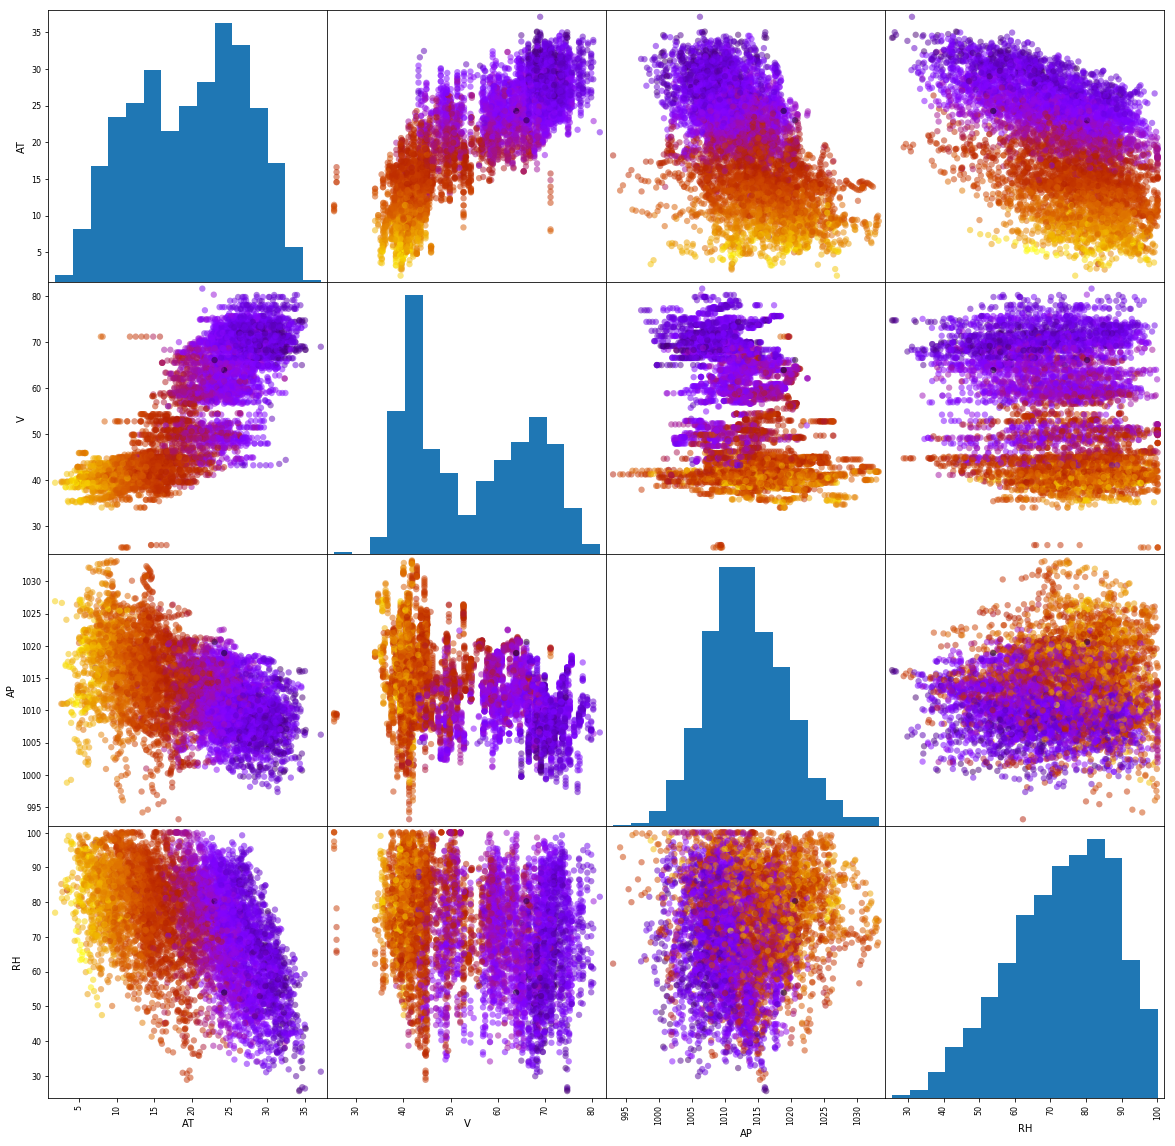

In [24]:
cmap = plt.get_cmap('gnuplot')
pd.scatter_matrix(X_train , c = y_train , marker = 'o' , s = 40 , hist_kwds={'bins':15} , figsize = (20 , 20) , cmap = cmap )

plt.show()

###  Trying with LR

In [25]:
lr = DecisionTreeRegressor()

In [26]:
lr.fit(X_train ,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
lr.score(X_test, y_test)

0.9299673356045126

In [28]:
# getting the acc of 92% , Now making the prediction
y_predict = lr.predict(X_test)

In [29]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(lr , out_file=None , feature_names=['AT','AP','V','RH'] ,class_names = y_train
                               , filled = True , rounded =True , special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render' , view = True)

'dtree_render.pdf'

In [30]:
y_true = pd.Series([int(i) for i in y_test])
y_pred = pd.Series([int(j) for j in y_predict])
pd.crosstab(y_true, y_pred,  rownames=['True Values'], colnames=['Predicted'], margins=True)

Predicted,420,425,426,427,428,429,430,431,432,433,...,486,487,488,489,490,491,492,493,494,All
True Values,,,,,,,,,,,,,,,,,,,,,
425,0,3,2,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
426,0,4,2,3,5,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20
427,0,1,1,4,3,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,17
428,0,2,0,5,6,3,2,1,2,1,...,0,0,0,0,0,0,0,0,0,28
429,0,2,3,2,7,1,1,5,3,3,...,0,0,0,0,0,0,0,0,0,33
430,0,1,0,1,5,3,12,3,7,0,...,0,0,0,0,0,0,0,0,0,47
431,0,1,0,2,1,1,10,5,14,1,...,0,0,0,0,0,0,0,0,0,51
432,0,1,0,1,1,2,12,4,10,9,...,0,0,0,0,0,0,0,0,0,69
433,0,2,0,2,2,3,3,5,6,7,...,0,0,0,0,0,0,0,0,0,54


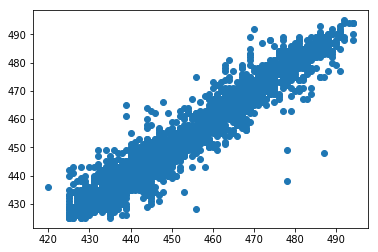

In [31]:
plt.scatter([int(i) for i in y_predict], [int(i) for i in y_test])

Text(249,0.5,'Predicted value')

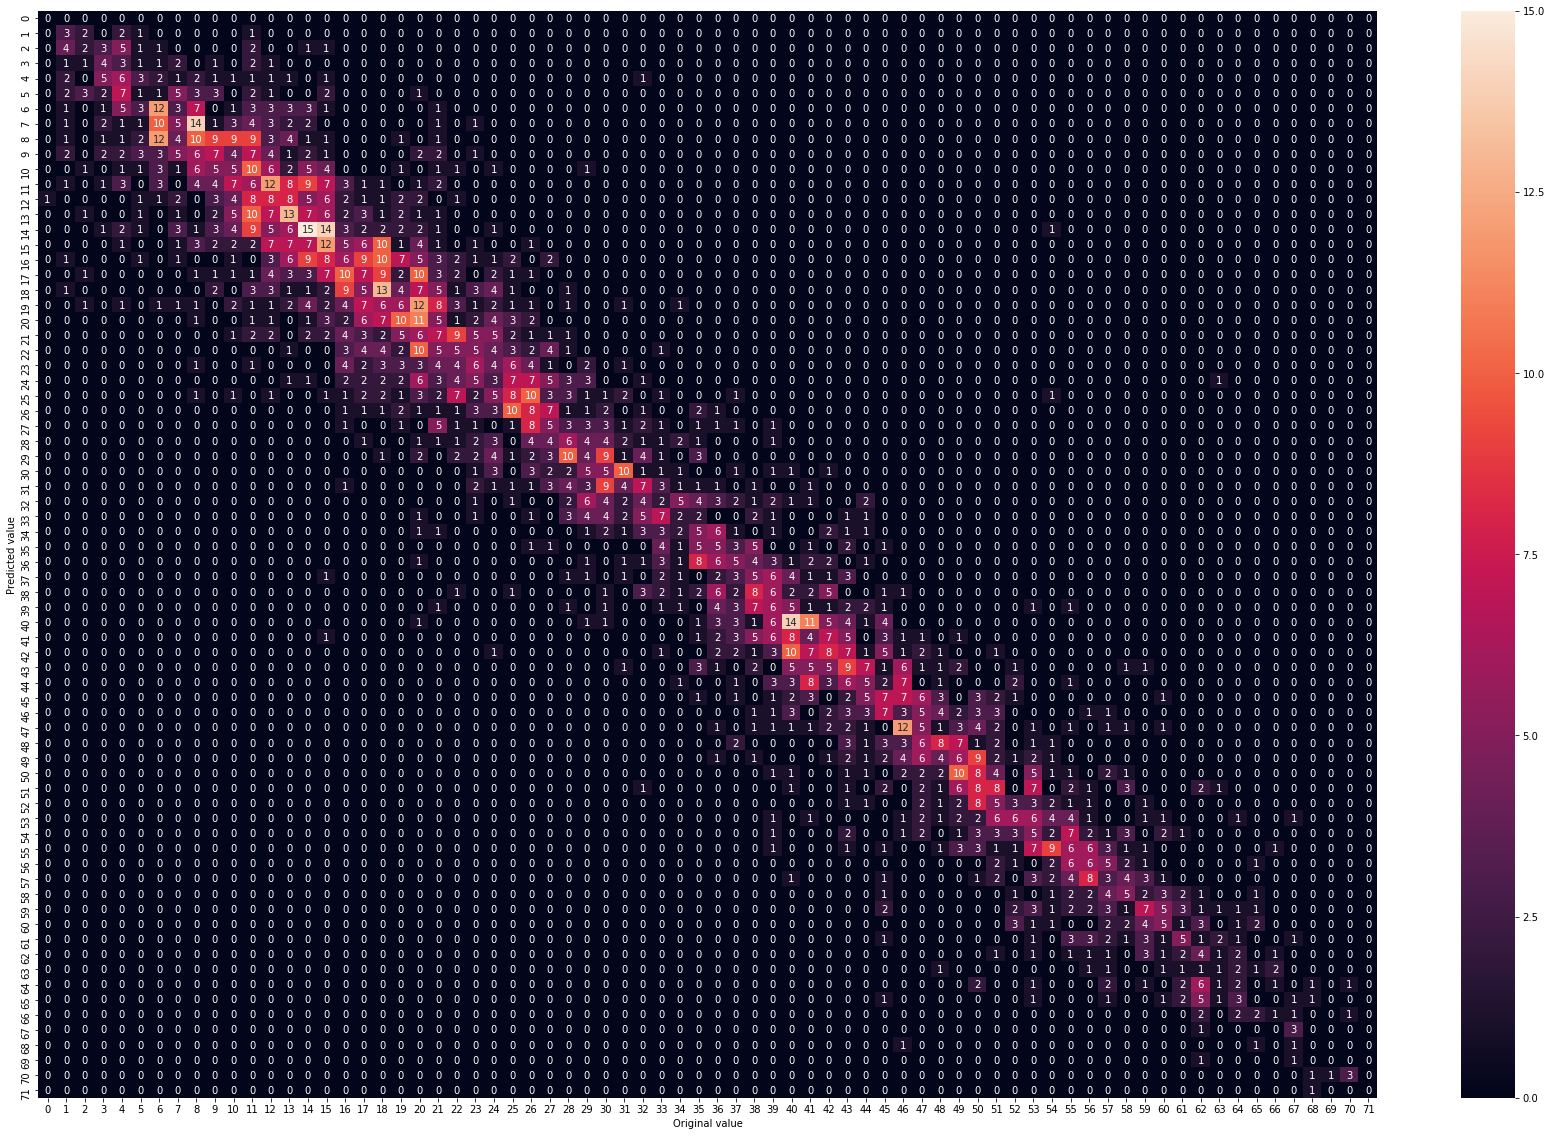

In [32]:
plt.figure(figsize=(30 , 20))
sns.heatmap(confusion_matrix([int(i) for i in y_test], [int(i) for i in y_predict]) , annot = True , fmt='.5g')
plt.xlabel("Original value")
plt.ylabel("Predicted value")

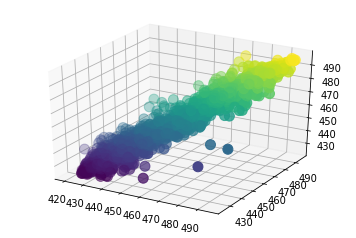

In [33]:
fig = plt.figure()
predict = [int(i) for i in y_predict]
ax1 = fig.add_subplot(111, projection='3d')

# rs = np.array(df["AP"])
rm = np.array(y_test)

p = rm.reshape(-1,1)
# z = rs.reshape(-1,1)

ax1.scatter(y_predict, y_test, p , c = y_test , marker = 'o' , s =100)
# ax1.plot_wireframe(y_predict , y_test , p)
# ax1.scatter(df['V'],df['AT'],z)
plt.show()

###  Checking the Similarity b/w our Prediction & Acutual Value

Text(0.5,1,'Predition Value Graph')

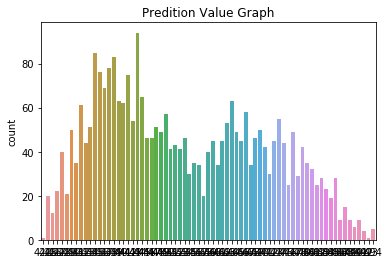

In [34]:
# This is Prediction Value Graph
# plt.figure(figsize=(30 , 20))

sns.countplot([int(i) for i in y_predict])
plt.title("Predition Value Graph")

Text(0.5,1,'Actual or True Value Graph')

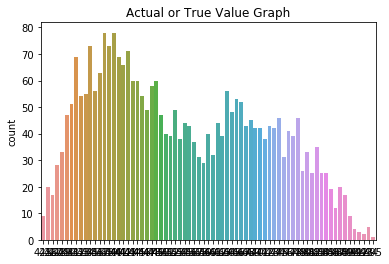

In [35]:
# This is True Value Graph
# plt.figure(figsize=(30 , 20))

sns.countplot([int(i) for i in y_test])
plt.title("Actual or True Value Graph")

### Now , Moving ahead to our Objective

In [36]:
# Find the mean / avg range from out data set
lst = [int(i) for i in y_test]
predict_lst = [int(i) for i in y_predict]

print(len(lst)); print(len(predict_lst))

2871
2871


In [37]:
print("max value --> ",max(lst))
print("No. of count of max-->",lst.count(min(lst)))

max value -->  495
No. of count of max--> 9


In [38]:
print("min value --> ",min(lst))
print("No. of count of min-->",lst.count(max(lst)))

min value -->  425
No. of count of min--> 1


In [39]:
# Now the avg of original value 

print("avg value --> ",int(np.average(lst)))
print("No. of count of avg-->",lst.count(int(np.average(lst))))

avg value -->  454
No. of count of avg--> 38


In [40]:
# Now the avg of predicted model

print("avg value --> ",int(np.average(predict_lst)))
print("No. of count of avg-->",lst.count(int(np.average(predict_lst))))

avg value -->  453
No. of count of avg--> 49


We can See above that there is No single Avg Value by Original Value & Predicted model
Hence we are taking the range of Value's from
450 to 455

In [41]:
# Taking the range of Avg value form 450 to 455 for more Accuracy

def data_values(test_data):
    categories = ['Min' , 'Optimal' , 'Max']
    values = []
    for i in [int(j) for j in test_data]:
        if i < 451:
            values.append(categories[0])
        elif i in [j for j in range(451 , 455)]:
            values.append(categories[1])
        elif i > 454:
            values.append(categories[2])
#     print(values)        
    return values

In [42]:
lor = SVC()

In [43]:
lor.fit(X_train,data_values(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
lor.score(X_test,data_values(y_test))

0.9285963079066527

In [45]:
lor.predict(X_test)

array(['Max', 'Min', 'Min', ..., 'Max', 'Min', 'Min'], dtype='<U7')

Text(33,0.5,'Predicted Data')

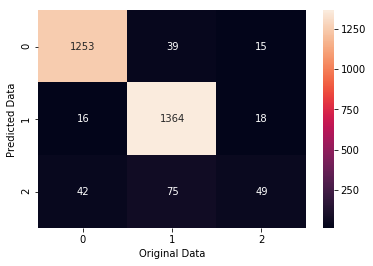

In [46]:
sns.heatmap(confusion_matrix(data_values(y_test) , lor.predict(X_test)), annot = True , fmt = '.5g')
plt.xlabel("Original Data")
plt.ylabel("Predicted Data")

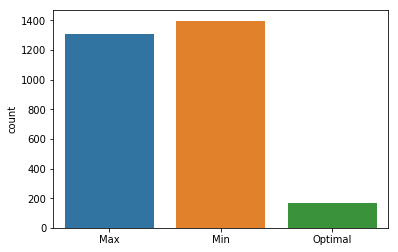

In [47]:
sns.countplot(data_values(y_test))

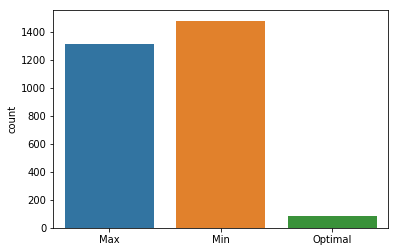

In [48]:
sns.countplot(lor.predict(X_test))

### Now , moving to the 2nd Objective tuning the parameter's

'''
Hence we Know that Ambient temp & Ambient Pressure Can't be Control in Industries But Rest of the 2 can be control
But we are tuning the parameter  combinationaly and Individulay over here for better result 
'''

In [49]:
# Ax=B
optimal = []
for i in range(len(fetaures)):
    optimal.append(451)
    optimal.append(452)
    optimal.append(453)
    optimal.append(454)
    
b = np.array(optimal).reshape(-1,4,1)
print(b)
len(b)

[[[451]
  [452]
  [453]
  [454]]

 [[451]
  [452]
  [453]
  [454]]

 [[451]
  [452]
  [453]
  [454]]

 ...

 [[451]
  [452]
  [453]
  [454]]

 [[451]
  [452]
  [453]
  [454]]

 [[451]
  [452]
  [453]
  [454]]]


9568

In [50]:
lst = np.array(df).reshape(-1,4,4)
print(lst)
len_lst = len(lst)
print(len_lst)

[[[   8.34   40.77 1010.84   90.01]
  [  23.64   58.49 1011.4    74.2 ]
  [  29.74   56.9  1007.15   41.91]
  [  19.07   49.69 1007.22   76.79]]

 [[  11.8    40.66 1017.13   97.2 ]
  [  13.97   39.16 1016.05   84.6 ]
  [  22.1    71.29 1008.2    75.38]
  [  14.47   41.76 1021.98   78.41]]

 [[  31.25   69.51 1010.25   36.83]
  [   6.77   38.18 1017.8    81.13]
  [  28.28   68.67 1006.36   69.9 ]
  [  22.99   46.93 1014.15   49.42]]

 ...

 [[   7.72   41.14 1025.11   96.75]
  [  27.06   43.77 1011.02   42.61]
  [  20.18   43.56 1013.14   39.16]
  [  18.51   50.9  1012.95   82.71]]

 [[  13.6    39.82 1013.34   86.1 ]
  [  33.42   68.51 1011.91   45.83]
  [  13.79   42.07 1018.27   88.06]
  [  15.12   48.92 1011.8    72.93]]

 [[  33.41   77.95 1010.3    59.72]
  [  15.99   43.34 1014.2    78.66]
  [  17.65   59.87 1018.58   94.65]
  [  23.68   51.3  1011.86   71.24]]]
2392


In [51]:
values_lst = []

for i in range(len_lst):
    values_lst.append(np.linalg.solve(lst[i], b[i]))

print(values_lst[0])

[[ 2.03992191]
 [-1.39496229]
 [ 0.45323395]
 [ 0.36343355]]


In [52]:
# values_lst[0].reshape(1,-1)[0].tolist()

x_lst = []
for i in range(len(values_lst)):
    for j in range(4):
        x_lst.append(values_lst[i].reshape(1,-1)[0].tolist())

print(np.array(x_lst))
x_list = np.array(x_lst)

[[ 2.03992191 -1.39496229  0.45323395  0.36343355]
 [ 2.03992191 -1.39496229  0.45323395  0.36343355]
 [ 2.03992191 -1.39496229  0.45323395  0.36343355]
 ...
 [ 0.94219622 -0.34388106  0.42980727  0.20248608]
 [ 0.94219622 -0.34388106  0.42980727  0.20248608]
 [ 0.94219622 -0.34388106  0.42980727  0.20248608]]


In [53]:
feat_lst = np.array(df)
print(feat_lst)
print(len(feat_lst))

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]
9568


In [54]:
# Making proper dataset
train_1 = [] ; test_1= []
train_2 = [] ; test_2= []
train_3 = [] ; test_3= []
train_4 = [] ; test_4= []

for i in range(len(feat_lst)):
    train_1.append(feat_lst[i][0])
    train_2.append(feat_lst[i][1])
    train_3.append(feat_lst[i][2])
    train_4.append(feat_lst[i][3])
    
    test_1.append(x_list[i][0])
    test_2.append(x_list[i][1])
    test_3.append(x_list[i][2])
    test_4.append(x_list[i][3])

m --> -0.08311400950888286 
 b--> 2.235126042209385


Text(0.5,1,'Amibent Temp & Tuning Line')

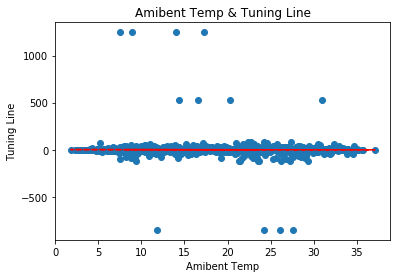

In [55]:
plt.scatter(train_1 , test_1)

m ,b = np.polyfit(train_1, test_1 ,1)
print("m -->",m,"\n","b-->",b)
y_lst_1 = []
for i in train_1:
    y = m * i + b
    y_lst_1.append(y)
    
plt.plot(train_1, y_lst_1 , 'r--')

plt.xlabel("Amibent Temp")
plt.ylabel("Tuning Line")
plt.title("Amibent Temp & Tuning Line")

In [56]:
# Checking most frequenty used Tuning value 
dist  = FreqDist(np.around(test_1 ,1))
dist.most_common(10)

[(0.3, 452),
 (0.4, 408),
 (0.2, 392),
 (0.1, 392),
 (-0.0, 388),
 (0.5, 376),
 (0.6, 332),
 (-0.2, 324),
 (0.7, 316),
 (-0.1, 284)]

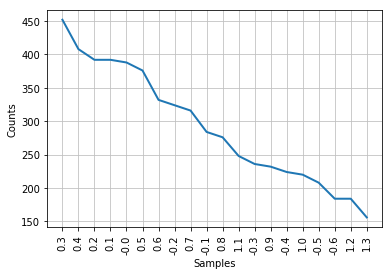

In [57]:
dist.plot(20)

m --> 0.06622532951372667 
 b--> -4.288347496159087


Text(0.5,1,'Vaccum & Tuning Line')

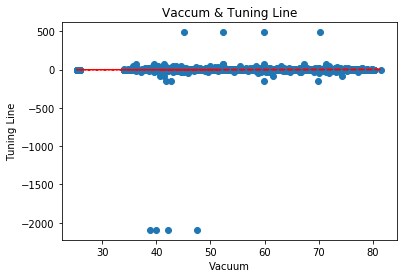

In [58]:
plt.scatter(train_2 , test_2)


m ,b = np.polyfit(train_2, test_2 ,1)
print("m -->",m,"\n","b-->",b)
y_lst_2 = []
for i in train_2:
    y = m * i + b
    y_lst_2.append(y)
    
plt.plot(train_2, y_lst_2 , 'r--')

plt.xlabel("Vacuum")
plt.ylabel("Tuning Line")
plt.title("Vaccum & Tuning Line")

In [59]:
# Checking most frequenty used Tuning value 
dist  = FreqDist(np.around(test_2 ,1))
dist.most_common(10)

[(0.0, 876),
 (-0.1, 828),
 (-0.2, 756),
 (0.1, 648),
 (0.2, 544),
 (-0.3, 536),
 (0.3, 412),
 (-0.4, 364),
 (-0.5, 336),
 (0.4, 324)]

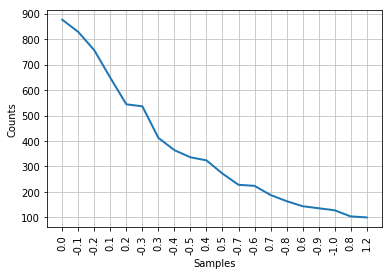

In [60]:
dist.plot(20)

m --> -0.0004925491375049655 
 b--> 0.9429108152401572


Text(0.5,1,'Amibent Pressure & Tuning Line')

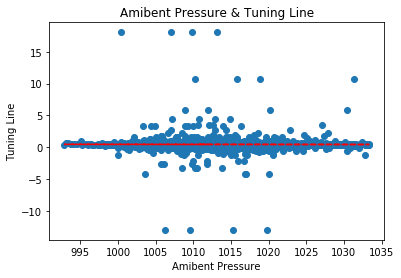

In [61]:
plt.scatter(train_3 , test_3)


m ,b = np.polyfit(train_3, test_3 ,1)
print("m -->",m,"\n","b-->",b)
y_lst_3 = []
for i in train_3:
    y = m * i + b
    y_lst_3.append(y)
    
plt.plot(train_3, y_lst_3 , 'r--')

plt.xlabel("Amibent Pressure")
plt.ylabel("Tuning Line")
plt.title("Amibent Pressure & Tuning Line")

In [62]:
# Checking most frequenty used Tuning value 
dist  = FreqDist(np.around(test_3 ,1))
dist.most_common(10)

[(0.4, 5744),
 (0.5, 2544),
 (0.3, 364),
 (0.6, 236),
 (0.2, 104),
 (0.7, 104),
 (0.1, 72),
 (0.8, 68),
 (-0.1, 52),
 (-0.0, 36)]

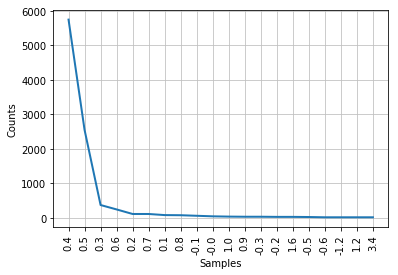

In [63]:
dist.plot(20)

m --> 0.009858875629803263 
 b--> -0.44486313209843853


Text(0.5,1,'Relative Humidity & Tuning Line')

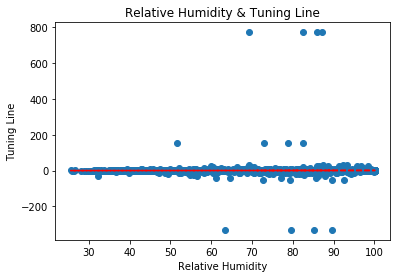

In [64]:
plt.scatter(train_4 , test_4)

m ,b = np.polyfit(train_4, test_4 ,1)
print("m -->",m,"\n","b-->",b)
y_lst_4 = []
for i in train_4:
    y = m * i + b
    y_lst_4.append(y)
    
plt.plot(train_4, y_lst_4 , 'r--')

plt.xlabel("Relative Humidity")
plt.ylabel("Tuning Line")
plt.title("Relative Humidity & Tuning Line")

In [65]:
# Checking most frequenty used Tuning value 
dist  = FreqDist(np.around(test_4 ,1))
dist.most_common(10)

[(0.0, 1416),
 (0.1, 1388),
 (0.2, 1044),
 (-0.1, 916),
 (0.3, 644),
 (-0.2, 468),
 (-0.3, 416),
 (0.4, 344),
 (0.5, 272),
 (-0.4, 264)]

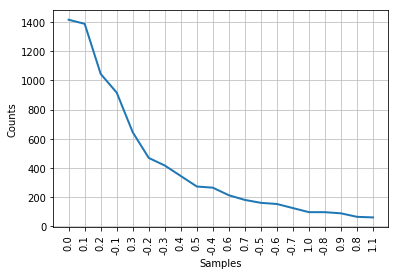

In [66]:
dist.plot(20)

###  This Model is for  '''Ambient Temp'''

In [67]:
X1_train , X1_test , y1_train , y1_test = train_test_split(train_1, y_lst_1)

In [68]:
avg_lr = LinearRegression()

In [69]:
avg_lr.fit(np.array(X1_train).reshape(-1,1) ,np.array(y1_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
avg_lr.score(np.array(X1_test).reshape(-1,1) ,np.array(y1_test).reshape(-1,1) )

1.0

In [71]:
avg_lr.predict(np.array(X1_test).reshape(-1,1))

array([[ 0.87953655],
       [ 0.70998397],
       [ 0.70250371],
       ...,
       [-0.39958806],
       [ 0.1074074 ],
       [ 1.11225577]])

###  This Model is for ''' Vacuume '''

In [72]:
X2_train , X2_test , y2_train , y2_test = train_test_split(train_2, y_lst_2)

In [73]:
avg_lr_2 = LinearRegression()

In [74]:
avg_lr_2.fit(np.array(X2_train).reshape(-1,1) ,np.array(y2_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
avg_lr_2.score(np.array(X2_test).reshape(-1,1) ,np.array(y2_test).reshape(-1,1) )

1.0

In [76]:
avg_lr_2.predict(np.array(X2_test).reshape(-1,1))

array([[-1.31350569],
       [-0.37641728],
       [-1.76648695],
       ...,
       [-1.55787716],
       [-0.35191391],
       [ 0.49577031]])

###  This Model is for '''Ambient Pressure'''

In [77]:
X3_train , X3_test , y3_train , y3_test = train_test_split(train_3, y_lst_3)

In [78]:
avg_lr_3 = LinearRegression()

In [79]:
avg_lr_3.fit(np.array(X3_train).reshape(-1,1) ,np.array(y3_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
avg_lr_3.score(np.array(X3_test).reshape(-1,1) ,np.array(y3_test).reshape(-1,1) )

1.0

In [81]:
avg_lr_3.predict(np.array(X3_test).reshape(-1,1))

array([[0.44106235],
       [0.4435448 ],
       [0.44353002],
       ...,
       [0.44468751],
       [0.43986546],
       [0.44375167]])

### This Model is for '''Relative Humidity'''

In [82]:
X4_train , X4_test , y4_train , y4_test = train_test_split(train_4, y_lst_4)

In [83]:
avg_lr_4 = LinearRegression()

In [84]:
avg_lr_4.fit(np.array(X4_train).reshape(-1,1) ,np.array(y4_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
avg_lr_4.score(np.array(X4_test).reshape(-1,1) ,np.array(y4_test).reshape(-1,1) )

1.0

In [86]:
predict = avg_lr_4.predict(np.array(X4_test).reshape(-1,1))
print(predict)

[[ 0.20966762]
 [-0.06923997]
 [ 0.1493313 ]
 ...
 [ 0.17969664]
 [ 0.3159463 ]
 [ 0.10427624]]


### Now testing or cross_validating  our model's

In [87]:
cross_check_lst = []; optimal_tuned_values =[]
for i in range(len(feat_lst)):
    
    temp = avg_lr.predict(np.array(feat_lst[i][0]).reshape(-1,1))
    vacuume = avg_lr_2.predict(np.array(feat_lst[i][1]).reshape(-1,1))
    pressure = avg_lr_3.predict(np.array(feat_lst[i][2]).reshape(-1,1))
    humidity = avg_lr_4.predict(np.array(feat_lst[i][3]).reshape(-1,1))
    
    optimal_tuned_values.append(feat_lst[i][0]*temp) 
    optimal_tuned_values.append(feat_lst[i][1]*vacuume) 
    optimal_tuned_values.append(feat_lst[i][2]*pressure)
    optimal_tuned_values.append(feat_lst[i][3]*humidity)
    
    new =  feat_lst[i][0]*temp + feat_lst[i][1]*vacuume + feat_lst[i][2]*pressure + feat_lst[i][3]*humidity 
    cross_check_lst.append(new) 

print("--------------- optimal tuned values-----------------\n",optimal_tuned_values)

--------------- optimal tuned values-----------------
 [array([[12.85990639]]), array([[-64.7566549]]), array([[449.84648839]]), array([[39.83250904]]), array([[6.39014867]]), array([[-24.26328813]]), array([[449.81672901]]), array([[21.27057562]]), array([[-7.03900002]]), array([[-29.59518344]]), array([[450.03485705]]), array([[-1.3276105]]), array([[12.39820567]]), array([[-49.57128426]]), array([[450.03140848]]), array([[23.97383243]]), array([[14.80169261]]), array([[-64.87813682]]), array([[449.49447446]]), array([[49.90438309]]), array([[15.00410591]]), array([[-66.37477428]]), array([[449.55768712]]), array([[32.92612933]]), array([[8.80257215]]), array([[30.8583217]]), array([[449.98262156]]), array([[22.48577205]]), array([[14.93978772]]), array([[-63.59119824]]), array([[449.19643683]]), array([[25.73191211]]), array([[-11.31833609]]), array([[21.89392326]]), array([[449.87750783]]), array([[-3.01124815]]), array([[11.32244722]]), array([[-67.19162338]]), array([[449.4546816

In [88]:
print("--------------- cross check lst-----------------\n", cross_check_lst)

--------------- cross check lst-----------------
 [array([[437.78224892]]), array([[453.21416516]]), array([[412.07306309]]), array([[436.83216232]]), array([[449.32241334]]), array([[431.11314808]]), array([[512.12928746]]), array([[426.27693842]]), array([[457.44184684]]), array([[422.38563716]]), array([[481.69559295]]), array([[403.82028814]]), array([[478.21960621]]), array([[422.81900667]]), array([[411.87126627]]), array([[463.61522667]]), array([[402.71343057]]), array([[439.23163196]]), array([[414.09491735]]), array([[389.79596085]]), array([[445.22645747]]), array([[433.69236253]]), array([[487.23264162]]), array([[435.23548535]]), array([[422.12557658]]), array([[415.55196593]]), array([[460.31394557]]), array([[440.21152812]]), array([[447.53994606]]), array([[462.88430693]]), array([[449.23535498]]), array([[462.32301523]]), array([[422.86455456]]), array([[451.24964006]]), array([[468.48790418]]), array([[429.26797842]]), array([[530.54136582]]), array([[516.67241775]]),

### Rough / Practice

In [89]:
my_lst_1 = []; my_lst_2 = []
for i in fetaures:
     if int(i) in [j for j in range(440 , 461)]:
        my_lst_2.append(int(i))   
        index = fetaures.tolist().index(i)
        X_lst = np.array(df).tolist()
        my_lst_1.append(X_lst[index])
        
print(my_lst_1)
print(my_lst_2)

print("\nlen of above list -->",len(my_lst_1))
print("\nlen of above list -->",len(my_lst_2))

# print("avg value predicting above feature's -->",np.average(lr.predict(my_lst)))
# print("max value predicting above feature's -->",max(lr.predict(my_lst)))
# print("min value predicting above feature's -->",min(lr.predict(my_lst)))

[[23.64, 58.49, 1011.4, 74.2], [19.07, 49.69, 1007.22, 76.79], [22.1, 71.29, 1008.2, 75.38], [22.99, 46.93, 1014.15, 49.42], [16.92, 44.6, 1017.34, 58.75], [22.72, 64.15, 1021.14, 60.34], [23.54, 41.1, 1002.05, 38.05], [25.37, 68.31, 1011.12, 70.99], [21.82, 58.66, 1011.71, 64.37], [20.77, 56.85, 1012.4, 83.63], [15.83, 52.75, 1024.3, 58.34], [25.91, 75.6, 1018.23, 62.65], [24.66, 60.29, 1018.0, 59.56], [21.48, 66.91, 1008.58, 84.49], [26.96, 65.34, 1015.05, 46.93], [16.01, 65.46, 1014.0, 87.68], [23.8, 48.6, 1002.43, 67.32], [25.28, 67.69, 1009.05, 68.54], [21.47, 70.32, 1011.72, 88.36], [18.3, 44.06, 1017.95, 63.24], [23.73, 61.02, 1009.71, 78.7], [28.26, 65.34, 1014.56, 43.4], [17.74, 50.88, 1015.56, 89.78], [19.13, 68.61, 1010.65, 94.92], [23.82, 48.92, 1010.48, 44.45], [29.92, 69.75, 1009.12, 67.15], [16.18, 50.88, 1014.06, 100.09], [26.37, 54.5, 1014.48, 66.31], [21.24, 41.67, 1012.6, 49.27], [24.98, 58.05, 1011.69, 69.97], [26.63, 64.44, 1012.66, 61.19], [18.87, 52.08, 1005.25, 

In [90]:
lsts = np.array(my_lst_1[:-2]).reshape(-1,4,4)
lsts_1 = np.array(my_lst_2[:-2]).reshape(-1,4,1)
print(lsts)
print(lsts_1)

len_lst = len(lsts)
print(len_lst)
print(len(lsts))

[[[  23.64   58.49 1011.4    74.2 ]
  [  19.07   49.69 1007.22   76.79]
  [  22.1    71.29 1008.2    75.38]
  [  22.99   46.93 1014.15   49.42]]

 [[  16.92   44.6  1017.34   58.75]
  [  22.72   64.15 1021.14   60.34]
  [  23.54   41.1  1002.05   38.05]
  [  25.37   68.31 1011.12   70.99]]

 [[  21.82   58.66 1011.71   64.37]
  [  20.77   56.85 1012.4    83.63]
  [  15.83   52.75 1024.3    58.34]
  [  25.91   75.6  1018.23   62.65]]

 ...

 [[  28.07   61.47 1008.68   64.83]
  [  21.93   62.91 1013.45   74.62]
  [  17.46   53.29 1018.07   91.01]
  [  22.48   67.45 1014.77   63.9 ]]

 [[  25.18   62.96 1020.04   59.08]
  [  21.68   64.15 1021.09   70.88]
  [  24.2    64.33 1011.15   84.23]
  [  28.28   56.9  1006.38   64.99]]

 [[  18.9    62.96 1020.69   80.57]
  [  23.66   61.86 1013.33   83.09]
  [  25.17   64.79 1017.87   63.26]
  [  18.51   50.9  1012.95   82.71]]]
[[[445]
  [453]
  [442]
  [451]]

 [[460]
  [453]
  [448]
  [441]]

 [[452]
  [442]
  [458]
  [443]]

 ...

 [[442]
  

In [91]:
values_lst_1 = []

for i in range(len(lsts)):
#     print(lsts[i].shape)
#     print(lsts_1[i].shape)
    a ,b,c,d= np.linalg.lstsq(lsts[i], lsts_1[i])
    values_lst_1.append(a)

print(values_lst_1)
print(len(values_lst_1))

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[array([[-1.61809064],
       [-0.30492253],
       [ 0.49561737],
       [-0.002437  ]]), array([[-1.55618773],
       [ 0.03113482],
       [ 0.49328485],
       [-0.2875971 ]]), array([[ 1.84864612],
       [-1.23134672],
       [ 0.51344792],
       [-0.55254092]]), array([[-0.80569978],
       [ 0.11775067],
       [ 0.44302964],
       [ 0.11358622]]), array([[-1.25296931],
       [ 0.22425962],
       [ 0.49742471],
       [-0.58989606]]), array([[-2.11042249],
       [-0.14554633],
       [ 0.51096162],
       [-0.19010794]]), array([[ 0.62356106],
       [-0.65680273],
       [ 0.44784072],
       [ 0.24169788]]), array([[ 0.27902093],
       [-0.84518527],
       [ 0.47930942],
       [ 0.05974725]]), array([[-1.07772   ],
       [-0.24537619],
       [ 0.49523235],
       [-0.2031915 ]]), array([[-0.83254763],
       [ 0.04912292],
       [ 0.45716807],
       [-0.05530408]]), array([[ 2.95197835],
       [-2.55961801],
       [ 0.46214438],
       [ 0.65581133]]), array([[-

In [92]:
# Now taking out the avg of all
A = []; B= []; C=[]; D=[]
for i in range(len(values_lst_1)):
        A.append(values_lst_1[i][0][0])
        B.append(values_lst_1[i][1][0])
        C.append(values_lst_1[i][2][0])
        D.append(values_lst_1[i][3][0])
        
print(len(A))
avg_a = (sum(A)/ len(A))    
avg_b = (sum(B)/ len(B))
avg_c = (sum(C)/ len(C))
avg_d = (sum(D)/ len(D))

print(avg_a); print(avg_b); print(avg_c); print(avg_d)

avg_lst = []
avg_lst.append(avg_a)
avg_lst.append(avg_b)
avg_lst.append(avg_c)
avg_lst.append(avg_d)

print(avg_lst)

885
0.2996628619733671
-0.540847129869698
0.4674787571206033
0.01033743326619968
[0.2996628619733671, -0.540847129869698, 0.4674787571206033, 0.01033743326619968]


In [93]:
train , test = train_test_split(my_lst_1, test_size = 0.3)
len(train)

2479

In [94]:
pred_value = []
for i in range(len(test)):
    value_1 = my_lst_1[i][0] * avg_lst[0]
    value_2 = my_lst_1[i][0] * avg_lst[1]
    value_3 = my_lst_1[i][0] * avg_lst[2]
    value_4 = my_lst_1[i][0] * avg_lst[3]
    
    pred_value.append(value_1)
    pred_value.append(value_2)
    pred_value.append(value_3)
    pred_value.append(value_4)

print(pred_value)
    

[7.0840300570503985, -12.78562615011966, 11.051197818331064, 0.24437692241296044, 5.714570777832111, -10.31395476661514, 8.914819898289906, 0.19713485238642792, 6.622549249611414, -11.952721570120326, 10.331280532365334, 0.22845727518301295, 6.889249196767709, -12.434075515704356, 10.747336626202669, 0.23765759078993062, 5.070295624589372, -9.151133437395291, 7.909740570480609, 0.1749093708640986, 6.8083402240349, -12.288046790639537, 10.621117361780106, 0.23486648380805672, 7.054063770853062, -12.73154143713269, 11.004449942619003, 0.24334317908634046, 7.6024468082643235, -13.721291684794238, 11.859936068149707, 0.2622606819634859, 6.53864364825887, -11.80128437375681, 10.200386480371565, 0.22556279386847702, 6.223997643186835, -11.233394887393626, 9.709533785394932, 0.21470848893896735, 4.743663105038402, -8.56161006583732, 7.4001887252191505, 0.16364156860394094, 7.764264753729942, -14.013349134923875, 12.112374596994833, 0.2678428959272337, 7.389686176263233, -13.337290222586752, 1

In [95]:
# This is for the predicted Value 450 & 455

my_lst = []
for i in y_predict:
    if int(i) in range(450 , 455):
        index = y_predict.tolist().index(i)
        X_lst = np.array(X_test).tolist()
        my_lst.append(X_lst[index])
        
print(my_lst)

print("\nlen of above list -->",len(my_lst))
print("avg value predicting above feature's -->",np.average(lr.predict(my_lst)))
print("max value predicting above feature's -->",max(lr.predict(my_lst)))
print("min value predicting above feature's -->",min(lr.predict(my_lst)))

[[17.14, 58.16, 1018.59, 77.22], [16.16, 25.88, 1009.58, 72.24], [19.93, 62.1, 1019.94, 76.41], [25.61, 52.36, 1014.1, 62.9], [20.33, 57.76, 1016.47, 75.35], [26.38, 44.89, 1009.14, 51.79], [18.13, 60.1, 1009.67, 84.75], [20.21, 58.12, 1015.36, 79.18], [22.75, 58.86, 1016.0, 67.34], [20.52, 57.76, 1017.03, 81.19], [18.12, 50.16, 1009.82, 100.09], [18.4, 44.06, 1017.36, 70.88], [18.68, 46.0, 1002.2, 97.17], [18.19, 44.06, 1017.24, 78.73], [20.94, 58.16, 1016.88, 65.43], [19.23, 45.01, 1012.24, 72.91], [18.77, 58.66, 1010.34, 87.25], [22.35, 65.61, 1016.27, 73.93], [23.19, 45.61, 1013.18, 73.46], [19.9, 56.53, 1020.52, 78.05], [18.4, 50.16, 1011.51, 98.07], [22.19, 48.78, 1017.84, 76.01], [20.74, 59.8, 1015.46, 76.39], [17.79, 40.12, 1012.74, 79.03], [22.08, 55.5, 1018.42, 58.46], [19.05, 44.06, 1017.02, 73.76], [17.99, 43.72, 1008.64, 75.04], [22.5, 58.79, 1017.48, 73.02], [20.61, 63.86, 1015.43, 73.86], [19.55, 56.53, 1020.2, 78.1], [18.95, 46.21, 1013.47, 81.22], [18.22, 49.25, 1020.3

In [96]:
# This is for the True / Original Value 450 & 455

my_lst_true = []
for i in y_test:
    if int(i) in range(450 , 455):
        index = y_test.tolist().index(i)
        X_lst = np.array(X_test).tolist()
        my_lst_true.append(X_lst[index])
        
print(my_lst_true)

print("\nlen of above list -->",len(my_lst_true))
print("avg value predicting above feature's -->",np.average(lr.predict(my_lst_true)))
print("max value predicting above feature's -->",max(lr.predict(my_lst_true)))
print("min value predicting above feature's -->",min(lr.predict(my_lst_true)))

[[24.14, 41.1, 1002.1, 38.49], [20.19, 58.86, 1014.3, 71.64], [21.9, 47.43, 1006.8, 60.48], [19.93, 62.1, 1019.94, 76.41], [23.25, 51.86, 1013.54, 78.34], [25.61, 52.36, 1014.1, 62.9], [20.33, 57.76, 1016.47, 75.35], [20.21, 58.12, 1015.36, 79.18], [20.52, 57.76, 1017.03, 81.19], [18.12, 50.16, 1009.82, 100.09], [21.39, 62.96, 1019.49, 72.24], [21.23, 50.59, 1017.42, 69.26], [25.6, 63.9, 1013.16, 53.19], [19.23, 45.01, 1012.24, 72.91], [18.77, 58.66, 1010.34, 87.25], [23.19, 45.61, 1013.18, 73.46], [15.77, 58.16, 1016.09, 82.56], [18.4, 50.16, 1011.51, 98.07], [20.7, 58.16, 1016.73, 68.19], [21.99, 58.96, 1014.09, 61.3], [20.74, 59.8, 1015.46, 76.39], [19.05, 44.06, 1017.02, 73.76], [17.99, 43.72, 1008.64, 75.04], [20.01, 45.09, 1014.21, 38.19], [16.22, 50.88, 1014.33, 100.09], [18.22, 49.25, 1020.33, 61.87], [17.16, 58.86, 1016.4, 86.39], [25.6, 63.9, 1013.16, 53.19], [20.3, 58.41, 1014.05, 86.38], [18.75, 63.09, 1018.19, 87.84], [20.78, 62.52, 1017.58, 73.3], [25.32, 54.5, 1015.5, 68

In [97]:
# data.hist(bins=100,figsize=(50,25))
# plt.show()

### Trying with ANN

In [98]:
# # Name of the log file 
# Name = "Power_Plant-{}".format(int(time.time())) <-------------------------------------imp
# tb = TensorBoard(log_dir= 'F:/Python Projects/GRAPH/vinayak/{}'.format(Name))
# print(Name)

In [99]:
# making a model now 
# model = Sequential()
# model.add(Dense(128 , input_shape = (2, ) ))
# model.add(Dense(128 , activation='relu'))
# model.add(Dense(32 , activation='relu'))
# model.add(Dense(1 ,  activation='linear'))
# model.compile(optimizer = 'adam', loss = 'mean_absolute_error' , metrics = ['accuracy'])
# ---------------------------------------------------------------------------------------------------------------------------
# model = Sequential()
# model.add(Dense(4,  input_dim = 4))
# model.add(Dense(1 ,activation = 'linear'))
# model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
# -------------------------------------------------------------------------------------------------------------------------
# def model():
#     # create model
#     model = Sequential()
#     model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam',  metrics = ['accuracy'])
#     return model
# -------------------------------------------------------------------------------------------------------------------------

# model = Sequential()
# model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(64, kernel_initializer='normal', activation='relu'))
# model.add(Dense(200, kernel_initializer='normal' ,  activation='relu'))
# model.add(Dense(400, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
# model.add(Dense(4000, kernel_initializer='normal', activation='relu'))
# model.add(Dense(8000, kernel_initializer='normal', activation='relu'))
# model.add(Dense(10000, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(10, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal' ,  activation='linear'))
# -------------------------------------------------------------------------------------------------------------------------

# model = Sequential()
# model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
# model.add(Dense(3, kernel_initializer='normal', activation='relu'))
# model.add(Dense(2, kernel_initializer='normal' ,  activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal' ,  activation='linear'))
# -------------------------------------------------------------------------------------------------------------------------

# Compile model
# model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

# temp =  np.linspace(min(df.AT),max(df.AT))         <-----------------------------------------imp
# vaccume = np.linspace(min(df.V),max(df.V))
# pressure =  np.linspace(min(df.AP),max(df.AP))
# humidity = np.linspace(min(df.RH),max(df.RH))
# output = np.linspace(min(fetaures),max(fetaures))
# # # 
# data =[]; output_lst = []
# for i in range(np.size(temp)):
#     data.append(temp[i])
#     data.append(vaccume[i]) 
#     data.append(pressure[i])
#     data.append(humidity[i])
#     output_lst.append(output[i])

# data_train = np.array(data).reshape(-1,4)
# output_train = np.array(output_lst)

# print(data_train)
# print(output_train)

# ---------------------------------------------------------------------------------------------------------
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(4,)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# ---------------------------------------------------------------------------------------------------------------        
   
# nodes = [4,8,16,32,64,128,512,1024]  <-----------------------------------imp

# model = Sequential()
# for i in nodes:
#     for j in nodes:
#         Name = "Power_Plant-{}-input_node-{}-node-{}".format(i , j ,int(time.time()))
#         print("\n\n",Name,"\n\n")
#         model.add(Dense(i, activation='relu', input_shape=(4,)))
#         model.add(Dense(j, activation='relu'))
            
#         model.add(Dense(1))
#         model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
        
#         tb = TensorBoard(log_dir= 'F:/Python Projects/GRAPH/vinayak/{}'.format(Name), histogram_freq=0, write_graph=True ,write_images= True)
        
#         model.fit(data_train, output_train, batch_size= 2 ,epochs= 50 , validation_split=0.1 ,verbose=1, callbacks = [tb])

In [100]:
# X_train.values[:,0:2]

In [101]:
# model.summary()

# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)
# # evaluate model with standardized dataset
# estimator = KerasRegressor(build_fn = model, epochs=10, batch_size=5, verbose=0)

In [102]:
# kfold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(estimator, X_train.values[:,1:4], y_train, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [103]:
# tb = TensorBoard(log_dir= 'F:/Python Projects/GRAPH/vinayak/{}'.format(Name), histogram_freq=0, write_graph=True ,write_images= True)

In [104]:
# temp =  np.linspace(min(df.AT),max(df.AT))
# vaccume = np.linspace(min(df.V),max(df.V))
# pressure =  np.linspace(min(df.AP),max(df.AP))
# humidity = np.linspace(min(df.RH),max(df.RH))
# output = np.linspace(min(fetaures),max(fetaures))

# print(temp); print(temp.shape);
# print(vaccume); print(vaccume.shape);
# print(pressure); print(pressure.shape);
# print(humidity); print(humidity.shape);
# # print(output); print(output.shape)

# data =[]; output_lst = []
# for i in range(np.size(temp)):
#     data.append(temp[i])
#     data.append(vaccume[i]) 
#     data.append(pressure[i])
#     data.append(humidity[i])
#     output_lst.append(output[i])

# data_train = np.array(data).reshape(-1,4)
# output_train = np.array(output_lst)

# print(data_train)
# print(output_train)

In [105]:
# np.array(y_train)
# output_train.shape

In [106]:
# model.fit(np.array(X_train), np.array(y_train) , epochs=100)

In [107]:
# std = MinMaxScaler(feature_range=(0,1))
# a = std.fit_transform(X_train)
# print(a)

In [108]:
# trainX = np.reshape(a, (a.shape[0], 1, a.shape[1]))
# print(trainX)

In [109]:
# b = std.fit_transform(np.array(y_train).reshape(-1,1))
# b = b.reshape(1,-1)[0]
# print(b)

In [110]:
# model.fit(np.array(X_train), np.array(y_train), batch_size= 1 ,epochs= 50 , validation_split=0.1 ,verbose=1 , callbacks = [tb])

In [111]:
# model.predict(np.array(X_test)) <------------------------------- imp

In [112]:
# scorr , acc = model.evaluate(np.array(X_test) ,np.array(y_test)) <-------------------------imp
# print("scorre --> ", scorr)
# print("acc --> ", acc)